In [19]:
import pandas as pd
import numpy as np 
import seaborn as sns
import pickle
import examples
import openTSNE

%matplotlib inline

import matplotlib.pyplot as plt

from scipy.stats import skew, zscore
df1 = pd.read_csv(r"C:\Users\Usuario\Downloads\INFO VISUALISATION\celeba_buffalo_l.csv")
def subset(df):
	mask = df.columns[~df.columns.str.startswith("emb")]
	subset = df[mask]
	subset = subset.drop(columns = ["image_name", "id"])
	return subset

subset1_features = subset(df1)
def subset_emb_columns(df):
    mask = df.columns[df.columns.str.startswith("emb")]
    subset = df[mask]
    return subset

# Example usage
subset_with_emb_columns = subset_emb_columns(df1)

In [16]:
def plot(x, y, **kwargs):
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
    alpha = kwargs.pop("alpha", 0.1)
    utils.plot(
        x,
        np.zeros_like(y),
        ax=ax[0],
        colors={0: "k"},
        alpha=alpha,
        draw_legend=False,
        **kwargs,
    )
    utils.plot(
        x,
        y,
        ax=ax[1],
        colors=utils.MOUSE_10X_COLORS,
        alpha=alpha,
        draw_legend=False,
        **kwargs,
    )

In [23]:
def rotate(degrees):
    phi = degrees * np.pi / 180
    return np.array([
        [np.cos(phi), -np.sin(phi)],
        [np.sin(phi), np.cos(phi)],
    ])
print(type(subset_with_emb_columns))
print(subset_with_emb_columns.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['embedding_0', 'embedding_1', 'embedding_2', 'embedding_3',
       'embedding_4', 'embedding_5', 'embedding_6', 'embedding_7',
       'embedding_8', 'embedding_9',
       ...
       'embedding_502', 'embedding_503', 'embedding_504', 'embedding_505',
       'embedding_506', 'embedding_507', 'embedding_508', 'embedding_509',
       'embedding_510', 'embedding_511'],
      dtype='object', length=512)


In [31]:
init = openTSNE.initialization.rescale(subset_with_emb_columns.iloc[:, :2])
aff500 = openTSNE.affinity.PerplexityBasedNN(
    subset_with_emb_columns.values,
    perplexity=500,
    n_jobs=32,
    random_state=0,
)
embedding_standard = openTSNE.TSNE(
    n_jobs=32,
    verbose=True,
).fit(affinities=aff500, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.7932, 50 iterations in 55.3509 sec
Iteration  100, KL divergence 3.7954, 50 iterations in 55.0569 sec
Iteration  150, KL divergence 3.7935, 50 iterations in 54.8922 sec
Iteration  200, KL divergence 3.7893, 50 iterations in 55.6390 sec
Iteration  250, KL divergence 3.7925, 50 iterations in 53.9083 sec
   --> Time elapsed: 274.85 seconds
===> Running optimization with exaggeration=1.00, lr=30012.00 for 500 iterations...
Iteration   50, KL divergence 2.3650, 50 iterations in 54.1594 sec
Iteration  100, KL divergence 2.1108, 50 iterations in 58.5711 sec
Iteration  150, KL divergence 2.0334, 50 iterations in 66.2037 sec
Iteration  200, KL divergence 2.0031, 50 iter

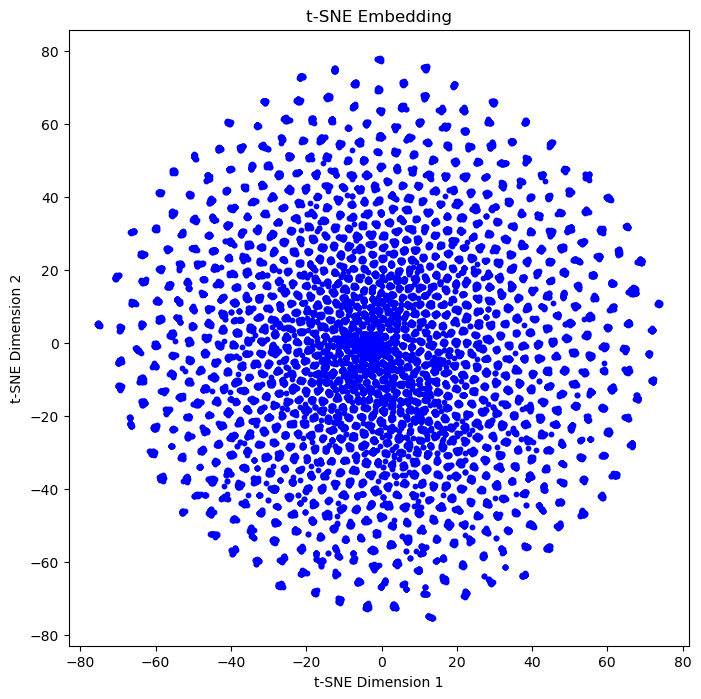

In [34]:
import matplotlib.pyplot as plt

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = embedding_standard

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(embedding_result[:, 0], embedding_result[:, 1], c='b', s=10)  # Adjust color and size as needed
plt.title('t-SNE Embedding')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [37]:
embedding_exagerated = openTSNE.TSNE(
    exaggeration=2,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff500, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=2, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.7932, 50 iterations in 55.2345 sec
Iteration  100, KL divergence 3.7938, 50 iterations in 54.9255 sec
Iteration  150, KL divergence 3.7931, 50 iterations in 58.5067 sec
Iteration  200, KL divergence 3.7925, 50 iterations in 57.7168 sec
Iteration  250, KL divergence 3.7896, 50 iterations in 56.4576 sec
   --> Time elapsed: 282.84 seconds
===> Running optimization with exaggeration=2.00, lr=15006.00 for 500 iterations...
Iteration   50, KL divergence 3.4907, 50 iterations in 55.5545 sec
Iteration  100, KL divergence 3.4881, 50 iterations in 54.6937 sec
Iteration  150, KL divergence 3.4888, 50 iterations in 54.6337 sec
Iteration  200, KL divergence

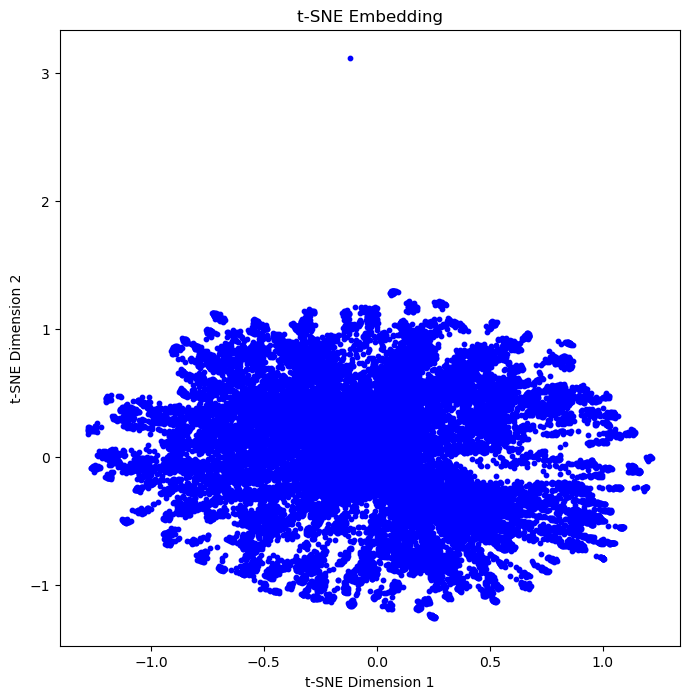

In [38]:
import matplotlib.pyplot as plt

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result2 = embedding_exagerated

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(embedding_result2[:, 0], embedding_result2[:, 1], c='b', s=10)  # Adjust color and size as needed
plt.title('t-SNE Embedding')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16724\1754402333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))


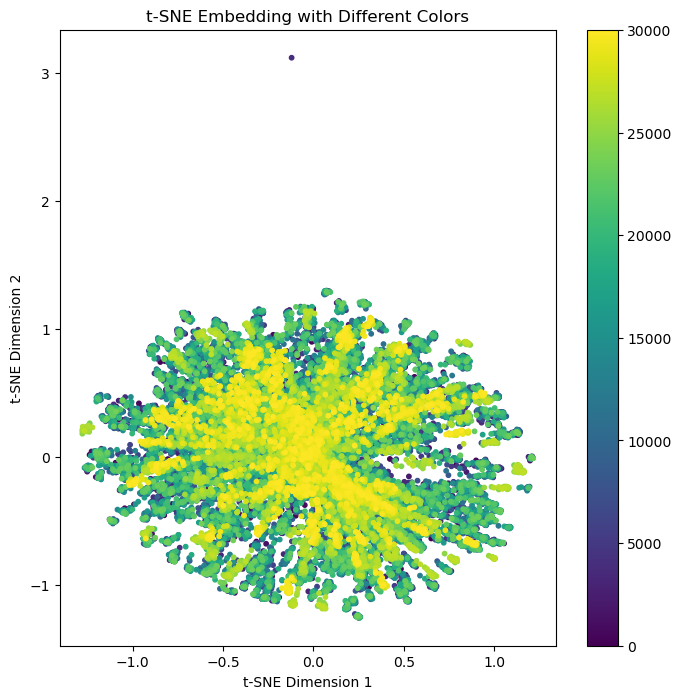

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = embedding_exagerated

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset_with_emb_columns['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16724\4087692274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))


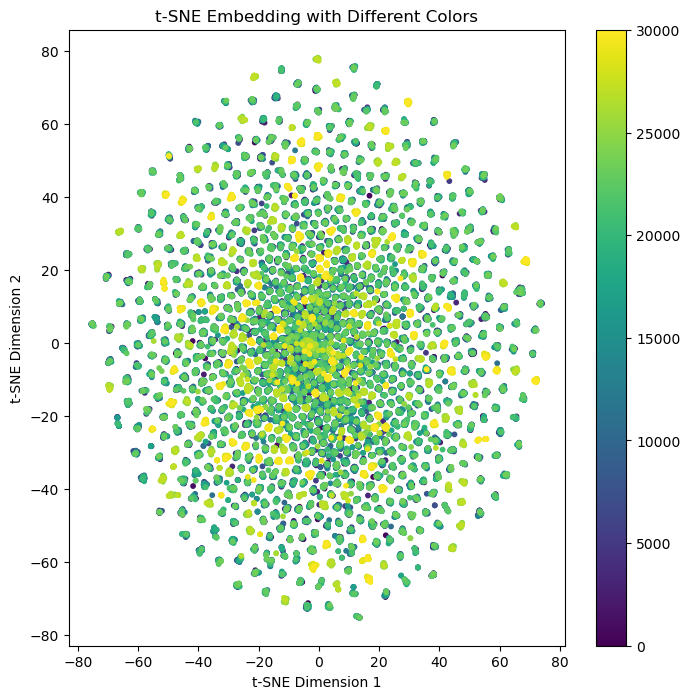

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
#STANDARD IS THE SAME AS EXAGERATION = 1
# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = embedding_standard

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset_with_emb_columns['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [51]:
embedding_exagerated1 = openTSNE.TSNE(
    exaggeration=3,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff500, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=3, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.7932, 50 iterations in 59.4080 sec
Iteration  100, KL divergence 3.7938, 50 iterations in 61.0550 sec
Iteration  150, KL divergence 3.7931, 50 iterations in 69.2087 sec
Iteration  200, KL divergence 3.7925, 50 iterations in 69.8907 sec
Iteration  250, KL divergence 3.7896, 50 iterations in 67.8070 sec
   --> Time elapsed: 327.37 seconds
===> Running optimization with exaggeration=3.00, lr=10004.00 for 500 iterations...
Iteration   50, KL divergence 3.7870, 50 iterations in 65.2232 sec
Iteration  100, KL divergence 3.7444, 50 iterations in 62.0439 sec
Iteration  150, KL divergence 3.7426, 50 iterations in 54.4297 sec
Iteration  200, KL divergence

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16724\2888972662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))


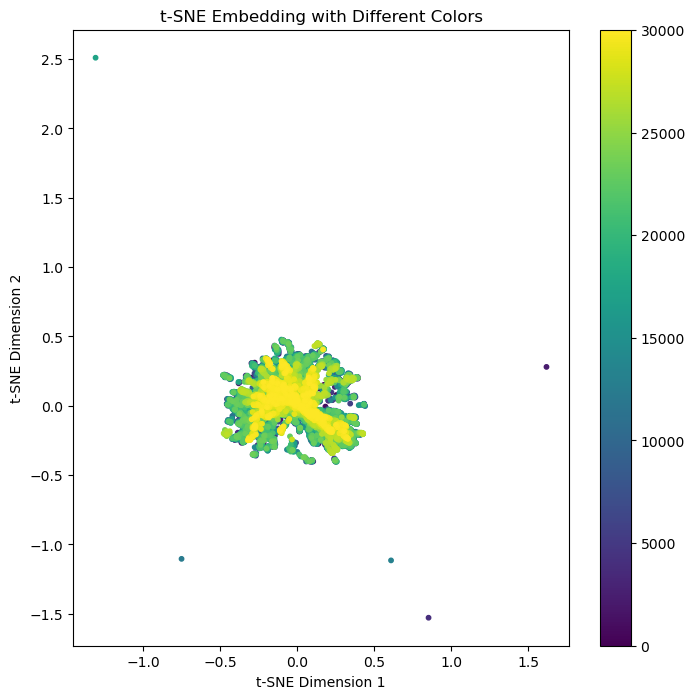

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = embedding_exagerated1

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset_with_emb_columns['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [63]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Now create the UMAP reducer
reducer = umap.UMAP()
emb_data = subset_with_emb_columns.values
scaled_data = StandardScaler().fit_transform(emb_data)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(30012, 2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16724\3276460014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))


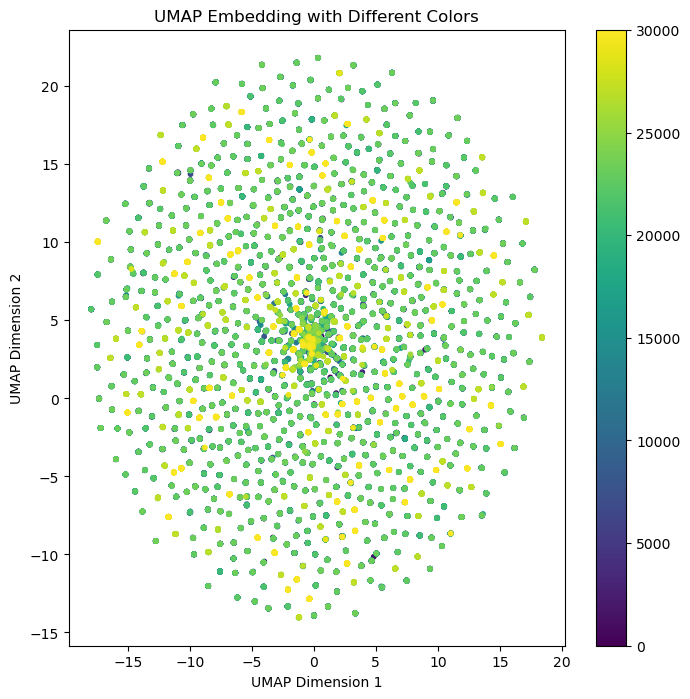

In [64]:
subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))
labels = subset_with_emb_columns['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('UMAP Embedding with Different Colors')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [66]:
# Assuming subset1_features.iloc[:, :2] contains your data
data = subset1_features.iloc[:, :2].values

# Explicitly convert the array to float
data = data.astype(float)

# Perform rescaling
init = openTSNE.initialization.rescale(data)
aff501 = openTSNE.affinity.PerplexityBasedNN(
    subset1_features.values,
    perplexity=500,
    n_jobs=32,
    random_state=0,
)
feature_exagerated = openTSNE.TSNE(
    exaggeration=3,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff501, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=3, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.5846, 50 iterations in 28.7248 sec
Iteration  100, KL divergence 3.5881, 50 iterations in 29.0713 sec
Iteration  150, KL divergence 3.5877, 50 iterations in 28.8949 sec
Iteration  200, KL divergence 3.5877, 50 iterations in 28.7057 sec
Iteration  250, KL divergence 3.5877, 50 iterations in 28.8104 sec
   --> Time elapsed: 144.21 seconds
===> Running optimization with exaggeration=3.00, lr=10004.00 for 500 iterations...
Iteration   50, KL divergence 2.9097, 50 iterations in 28.7333 sec
Iteration  100, KL divergence 2.9000, 50 iterations in 29.0267 sec
Iteration  150, KL divergence 2.8984, 50 iterations in 29.2574 sec
Iteration  200, KL divergence

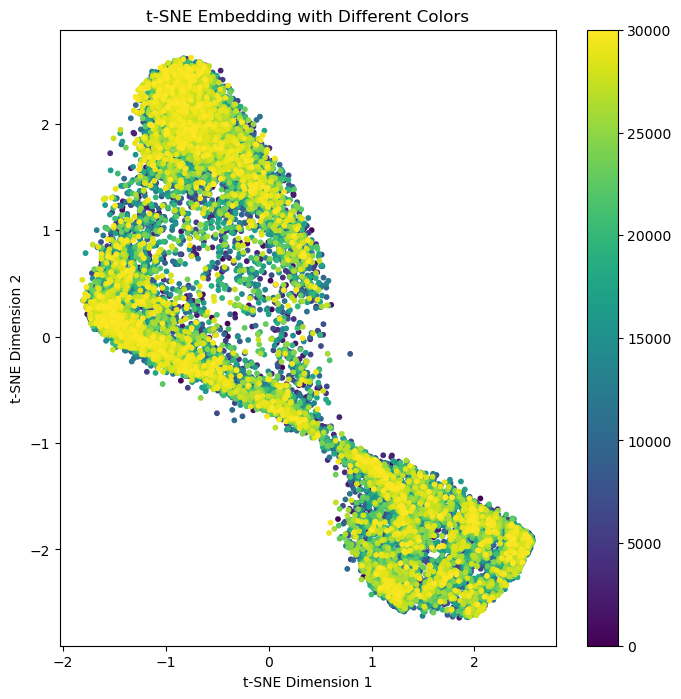

In [67]:
# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset1_features['label'] = range(len(subset1_features))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = feature_exagerated

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset1_features['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [68]:
feature_exagerated5 = openTSNE.TSNE(
    exaggeration=5,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff501, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=5, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.5846, 50 iterations in 31.2292 sec
Iteration  100, KL divergence 3.5881, 50 iterations in 31.8218 sec
Iteration  150, KL divergence 3.5877, 50 iterations in 31.1631 sec
Iteration  200, KL divergence 3.5877, 50 iterations in 30.1116 sec
Iteration  250, KL divergence 3.5877, 50 iterations in 28.8706 sec
   --> Time elapsed: 153.20 seconds
===> Running optimization with exaggeration=5.00, lr=6002.40 for 500 iterations...
Iteration   50, KL divergence 3.1901, 50 iterations in 31.6814 sec
Iteration  100, KL divergence 3.1885, 50 iterations in 29.0898 sec
Iteration  150, KL divergence 3.1885, 50 iterations in 28.9890 sec
Iteration  200, KL divergence 

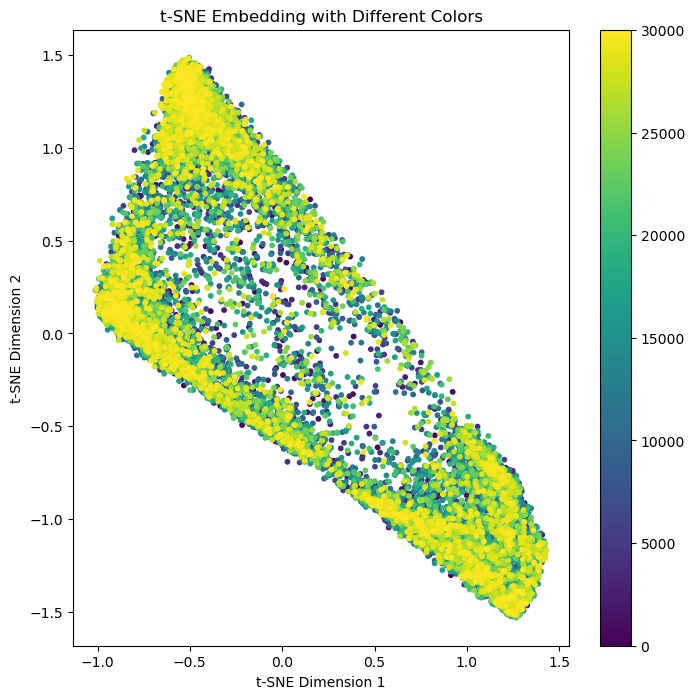

In [69]:
# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset1_features['label'] = range(len(subset1_features))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = feature_exagerated5

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset1_features['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [70]:
feature_exagerated8 = openTSNE.TSNE(
    exaggeration=8,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff501, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=8, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.5846, 50 iterations in 28.3829 sec
Iteration  100, KL divergence 3.5881, 50 iterations in 28.8120 sec
Iteration  150, KL divergence 3.5877, 50 iterations in 28.5763 sec
Iteration  200, KL divergence 3.5877, 50 iterations in 28.6775 sec
Iteration  250, KL divergence 3.5877, 50 iterations in 29.1148 sec
   --> Time elapsed: 143.56 seconds
===> Running optimization with exaggeration=8.00, lr=3751.50 for 500 iterations...
Iteration   50, KL divergence 3.4460, 50 iterations in 28.5609 sec
Iteration  100, KL divergence 3.4425, 50 iterations in 29.0753 sec
Iteration  150, KL divergence 3.4388, 50 iterations in 28.6552 sec
Iteration  200, KL divergence 

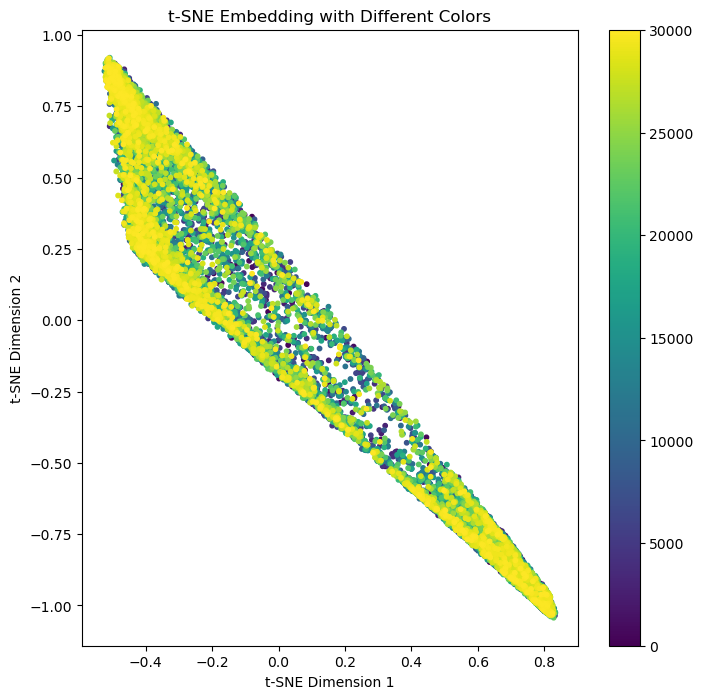

In [71]:
# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset1_features['label'] = range(len(subset1_features))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = feature_exagerated8

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset1_features['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [72]:
feature_exagerated7 = openTSNE.TSNE(
    exaggeration=7,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff501, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=7, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.5846, 50 iterations in 29.9047 sec
Iteration  100, KL divergence 3.5881, 50 iterations in 29.5720 sec
Iteration  150, KL divergence 3.5877, 50 iterations in 28.6437 sec
Iteration  200, KL divergence 3.5877, 50 iterations in 29.0256 sec
Iteration  250, KL divergence 3.5877, 50 iterations in 28.6343 sec
   --> Time elapsed: 145.78 seconds
===> Running optimization with exaggeration=7.00, lr=4287.43 for 500 iterations...
Iteration   50, KL divergence 3.3819, 50 iterations in 28.7360 sec
Iteration  100, KL divergence 3.3696, 50 iterations in 30.7673 sec
Iteration  150, KL divergence 3.3697, 50 iterations in 30.5857 sec
Iteration  200, KL divergence 

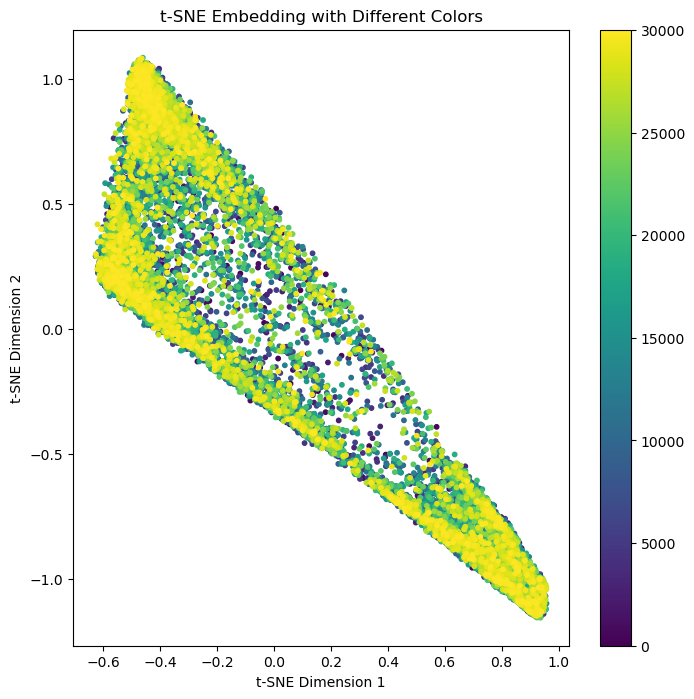

In [73]:
# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset1_features['label'] = range(len(subset1_features))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = feature_exagerated7

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset1_features['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()

In [74]:
feature_exagerated2 = openTSNE.TSNE(
    exaggeration=2,
    n_jobs=32,
    verbose=True,
).fit(affinities=aff501, initialization=init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=2, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2501.00 for 250 iterations...
Iteration   50, KL divergence 3.5846, 50 iterations in 36.1606 sec
Iteration  100, KL divergence 3.5881, 50 iterations in 39.1798 sec
Iteration  150, KL divergence 3.5877, 50 iterations in 36.8114 sec
Iteration  200, KL divergence 3.5877, 50 iterations in 39.5269 sec
Iteration  250, KL divergence 3.5877, 50 iterations in 40.9747 sec
   --> Time elapsed: 192.66 seconds
===> Running optimization with exaggeration=2.00, lr=15006.00 for 500 iterations...
Iteration   50, KL divergence 2.5448, 50 iterations in 38.0904 sec
Iteration  100, KL divergence 2.5376, 50 iterations in 35.3474 sec
Iteration  150, KL divergence 2.5437, 50 iterations in 45.0278 sec
Iteration  200, KL divergence

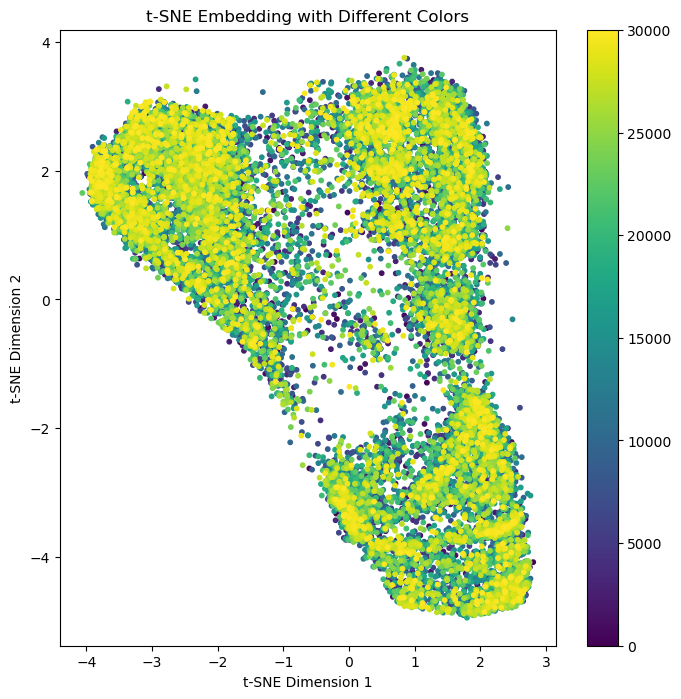

In [75]:
# Assuming `subset_with_emb_columns` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset1_features['label'] = range(len(subset1_features))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = feature_exagerated2

# Assuming `labels` contains the labels or group information for each data point
# Adjust this based on how your data is structured
labels = subset1_features['label']

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=labels,  # Use labels to specify colors
    cmap='viridis',  # Choose a colormap (you can use any valid matplotlib colormap)
    s=10  # Adjust size as needed
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()  # Add colorbar to show label-color mapping
plt.show()